In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# import important libraries

#for dataframe manipulations
import pandas as pd
# for mathemaical operations
import numpy as np
# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# setting parameters for visualization
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [3]:
# read the dataset
data=pd.read_csv('/content/drive/MyDrive/MED_insurance/med-insurance.csv')

In [4]:
# check first 5 rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Chi-square Test

In [ ]:
import scipy.stats as stats
# Crosstab
dataset_table=pd.crosstab(data['sex'],data['smoker'])
print(dataset_table)

smoker   no  yes
sex             
female  547  115
male    517  159


In [ ]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[547 115]
 [517 159]]


In [ ]:
val=stats.chi2_contingency(dataset_table)
val

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [ ]:
Expected_Values=val[3]
Expected_Values

array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]])

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 7.765921028604451


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.005324114164320548
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.005324114164320548


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
#size of the dataset
data.shape

(1338, 7)

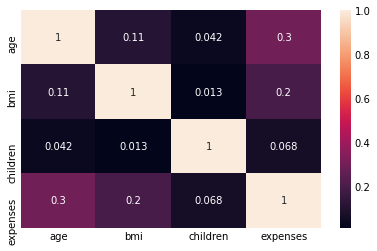

In [ ]:
cor=data.corr()
sns.heatmap(cor,annot=True)

In [ ]:
# check null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
# summary of the dataset
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



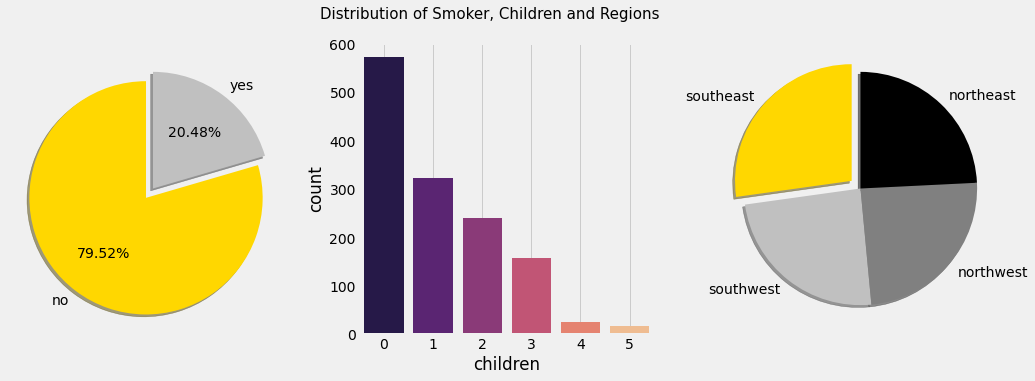

In [ ]:
# check the distribution of smoker, children and region
plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0],autopct='%1.2f%%')
plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()
plt.subplot(1,3,3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','silver','grey','black'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 15)
plt.show()

In [ ]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



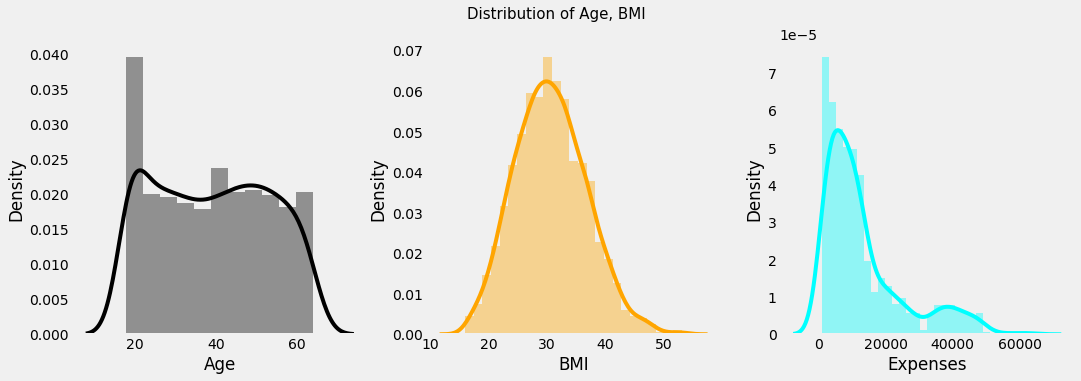

In [ ]:
# check the distribution of age, bmi and expenses
plt.subplot(1, 3, 1)
sns.distplot(data['age'], color = 'black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI', fontsize = 15)
plt.show()

In [ ]:
print(data.skew())
print(data.kurt())

age         0.055673
sex        -0.020951
bmi         0.284593
children    0.938380
smoker      1.464766
region     -0.047118
expenses    1.515880
dtype: float64
age        -1.245088
sex        -2.002557
bmi        -0.053370
children    0.202454
smoker      0.145756
region     -1.387661
expenses    1.606299
dtype: float64


## Bivariate Analysis

In [ ]:
# lets understand the impact of age on Medical Expenses
px.scatter(data, y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#  understand the impact of bmi on Medical Expenses
px.scatter(data, y = 'expenses',
           x = 'bmi',
           marginal_y = 'violin',
           trendline = 'ols')

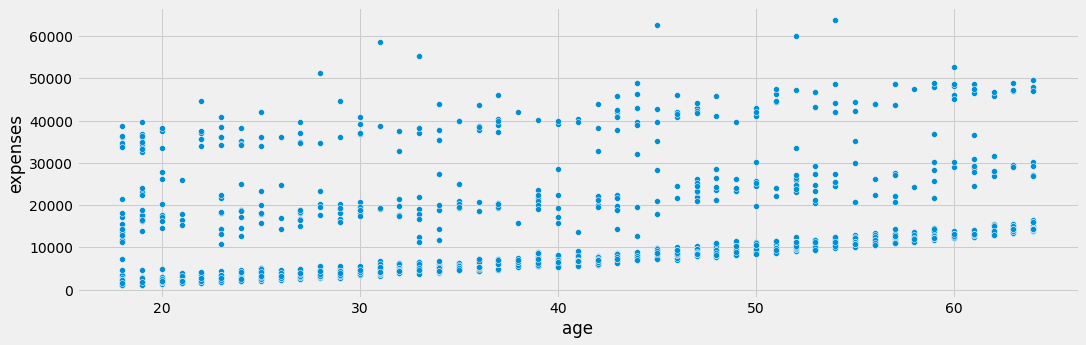

In [ ]:
sns.scatterplot(x='age',y='expenses',data=data)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



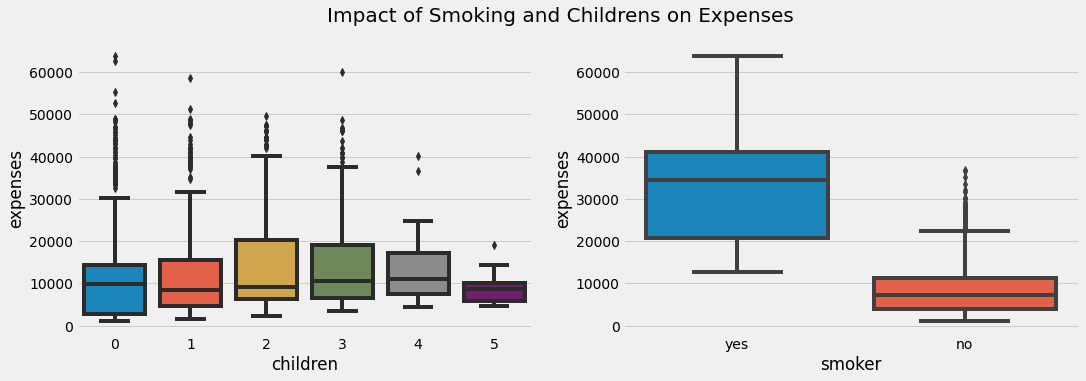

In [ ]:
# lets check the impact of smoking and childrens in Medical Expenses

plt.subplot(1, 2, 1)
sns.boxplot(data['children'], data['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of Smoking and Childrens on Expenses', fontsize = 20)
plt.show()

In [ ]:
data.groupby(['smoker'])['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268449,5993.781756,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231971,11541.547338,12829.46,20826.2450,34456.350,41019.205,63770.43


In [ ]:
p1=data[data['smoker']=='yes']['expenses']
p2=data[data['smoker']=='no']['expenses']

## t Test

In [ ]:
from statsmodels.stats.weightstats import ttest_ind as ttest
test1=ttest(p1,p2)
print(test1)
p_value=test1[1]
alpha=0.05
if p_value<0.05:
  print("NULL Hypothesis is rejected which means the expense of smoker and non-smoker is different, there is some association of smoker with expense")
else:
  print("NULL Hypothesis is accepted which means the expense of smoker and non-smoker is same, there is no association of smoker with expense")

(46.6649210792002, 8.271449574495316e-283, 1336.0)
NULL Hypothesis is rejected which means the expense of smoker and non-smoker is different, there is some association of smoker with expense


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data.groupby(['sex'])['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578897,11128.703817,1607.51,4885.1625,9412.965,14454.690,63770.43
male,676.0,13956.751420,12971.025897,1121.87,4619.1350,9369.615,18989.595,62592.87


In [ ]:
p3=data[data['sex']=='male']['expenses']
p4=data[data['sex']=='female']['expenses']
test2=ttest(p3,p4)
print(test2)

(2.0975468761820992, 0.03613269566075149, 1336.0)


In [ ]:
data.groupby(['children'])['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975767,12023.294017,1121.87,2734.4200,9856.950,14440.1200,63770.43
1,324.0,12731.171821,11823.631341,1711.03,4791.6450,8483.870,15632.0475,58571.07
2,240.0,15073.564000,12891.368314,2304.00,6284.9375,9264.980,20379.2750,49577.66
3,157.0,15355.318535,12330.869474,3443.06,6652.5300,10600.550,19199.9400,60021.40
4,25.0,13850.656800,9139.223594,4504.66,7512.2700,11033.660,17128.4300,40182.25
5,18.0,8786.035556,3808.434648,4687.80,5874.9750,8589.565,10019.9450,19023.26


In [ ]:
data.groupby(['region'])['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384691,11255.802916,1694.80,5194.3225,10057.655,16687.3650,58571.07
northwest,325.0,12417.575169,11072.276880,1621.34,4719.7400,8965.800,14711.7400,60021.40
southeast,364.0,14735.411538,13971.098797,1121.87,4440.8850,9294.130,19526.2875,63770.43
southwest,325.0,12346.937908,11557.179033,1241.57,4751.0700,8798.590,13462.5200,52590.83


## ANOVA for F Test

In [ ]:
p5=data[data['children']==0]['expenses']
p6=data[data['children']==1]['expenses']
p7=data[data['children']==2]['expenses']
p8=data[data['children']==3]['expenses']

In [ ]:
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
f,p=stats.f_oneway(p5,p6,p7,p8)
print(f,p)
if p< alpha:
  print("NULL Hypotheis is rejected,expense has some association with no of children")
else:
  print("NULL Hypotheis is accepted,expense has some association with no of children")

4.548095937976393 0.003539748765794969
NULL Hypotheis is rejected,expense has some association with no of children


In [ ]:
p9=data[data['region']==1]['expenses']
p10=data[data['region']==2]['expenses']
p11=data[data['region']==3]['expenses']
p12=data[data['region']==4]['expenses']

In [ ]:
f1,p1=stats.f_oneway(p9,p10,p11,p12)
print(f1,p1)

nan nan


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3333: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3336: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3343: RuntimeWarning:

invalid value encountered in double_scalars



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



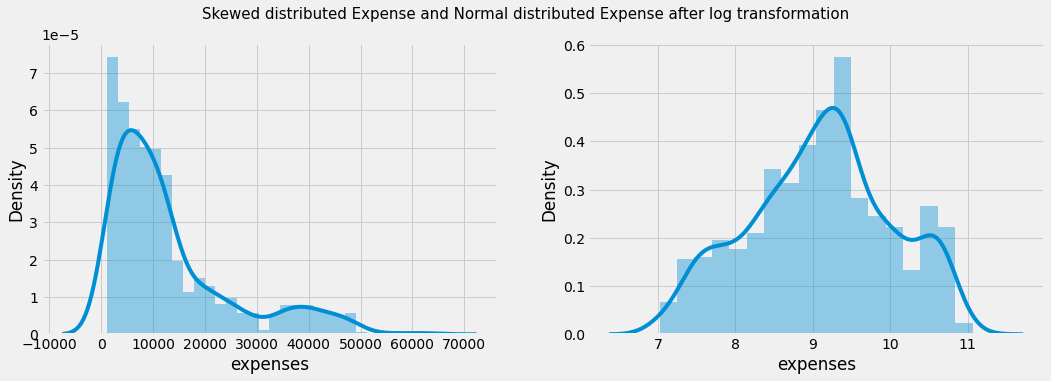

In [ ]:
plt.subplot(1,2,1)
sns.distplot(data['expenses'])
# Apply log transformation to normalise expenses
data['expenses'] = np.log1p(data['expenses'])
plt.subplot(1,2,2)
# lets again check the Distribution
sns.distplot(data['expenses'])
plt.suptitle('Skewed distributed Expense and Normal distributed Expense after log transformation',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



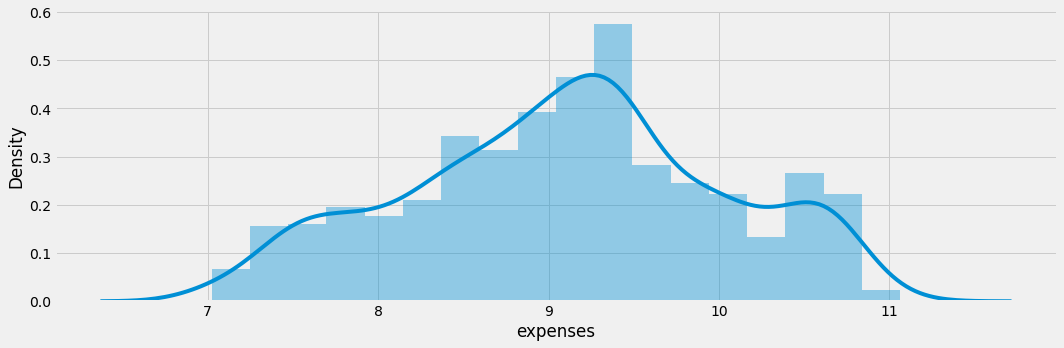

In [5]:
# Apply log transformation to normalise expenses
data['expenses'] = np.log1p(data['expenses'])

# lets again check the Distribution
sns.distplot(data['expenses'])

In [ ]:
data.iloc[0:3]

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,9.734235
1,18,male,33.8,1,no,southeast,7.453880
2,28,male,33.0,3,no,southeast,8.400763


In [ ]:
for i in data.columns[0:,]:
    #plt.subplots()
    #sns.distplot(sample_data[i])
    print('\n')
    print(f" the skewness of {i} is {data[i].skew()}")
    print('\n')
    print(f" the kurtosis of {i} is {data[i].kurt()}")



 the skewness of age is 0.05567251565299186


 the kurtosis of age is -1.2450876526418673


 the skewness of sex is -0.02095139743334541


 the kurtosis of sex is -2.0025566364991754


 the skewness of bmi is 0.28459296016731195


 the kurtosis of bmi is -0.05337020602503051


 the skewness of children is 0.5820335283869135


 the kurtosis of children is -1.0460578864312555


 the skewness of smoker is 1.4647661601953743


 the kurtosis of smoker is 0.1457555390520393


 the skewness of region is -0.047118426156455784


 the kurtosis of region is -1.3876609897557177


 the skewness of expenses is -0.08981719357456659


 the kurtosis of expenses is -0.6368554072831336


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



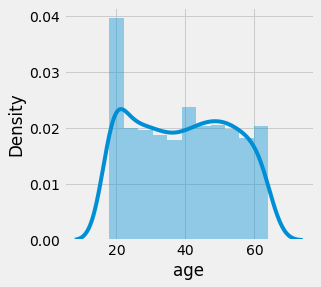

In [ ]:
sns.distplot(data['age'])

In [6]:
data['children'] = data['children'].replace((4, 5), (3, 3))

# lets check the value counts
data['children'].value_counts()

0    574
1    324
2    240
3    200
Name: children, dtype: int64

In [ ]:
## Multivariate Analysis

In [ ]:
px.scatter(data,
        x="expenses",
                 y="age",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols")

In [ ]:
px.scatter(data,
        x="expenses",
                 y="bmi",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols")

In [ ]:
px.scatter(data,
                 x="expenses",
                 y="bmi",
                 size="age",
                 color="smoker",
           hover_name="expenses", size_max=15)

In [ ]:
px.bar_polar(data,r='expenses',theta='region',color='sex',template='plotly_dark',color_discrete_sequence=px.colors.sequential.Plasma_r)

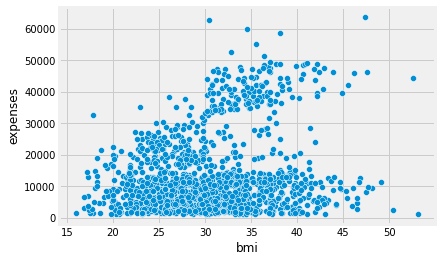

In [ ]:
sns.scatterplot(x='bmi',y='expenses',data=data)

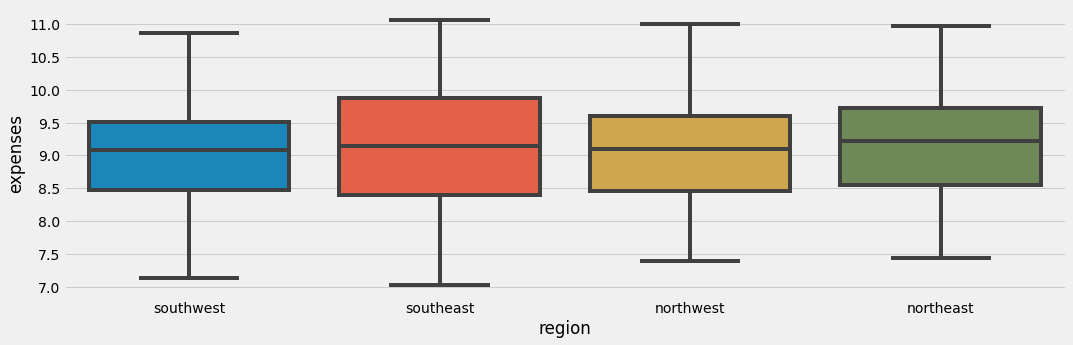

In [ ]:
sns.boxplot(x='region',y='expenses',data=data)
plt.show()

In [ ]:
data[['expenses', 'region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')

In [ ]:
data.groupby(['region'])['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384691,11255.802916,1694.80,5194.3225,10057.655,16687.3650,58571.07
northwest,325.0,12417.575169,11072.276880,1621.34,4719.7400,8965.800,14711.7400,60021.40
southeast,364.0,14735.411538,13971.098797,1121.87,4440.8850,9294.130,19526.2875,63770.43
southwest,325.0,12346.937908,11557.179033,1241.57,4751.0700,8798.590,13462.5200,52590.83


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,9.734235
1,18,male,33.8,1,no,southeast,7.453880
2,28,male,33.0,3,no,southeast,8.400763
3,33,male,22.7,0,no,northwest,9.998137
4,32,male,28.9,0,no,northwest,8.260457


In [ ]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
data['sex'] = data['sex'].replace(('male','female'), (2, 1))
data['smoker'] = data['smoker'].replace(('yes','no'), (2, 1))
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(4, 1, 3, 2))

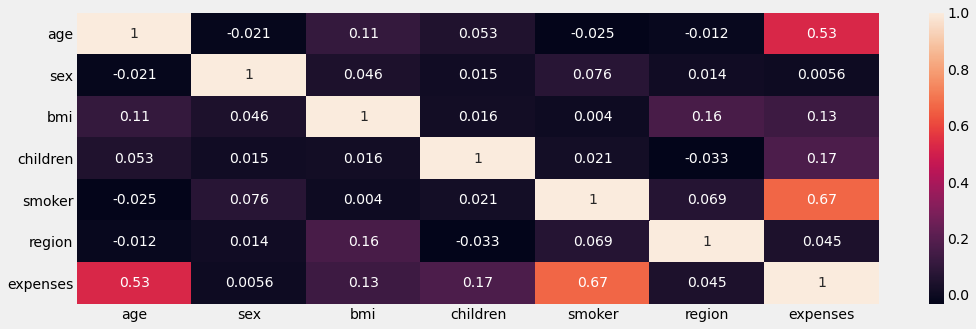

In [ ]:
cor=data.corr()
sns.heatmap(cor,annot=True)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,9.734235
1,18,2,33.8,1,1,4,7.453880
2,28,2,33.0,3,1,4,8.400763
3,33,2,22.7,0,1,2,9.998137
4,32,2,28.9,0,1,2,8.260457


In [ ]:
y = data['expenses']
x = data.drop(['expenses','bmi','region','sex'], axis = 1)
print(x.shape)
print(y.shape)

(1338, 3)
(1338,)


In [8]:
y = data['expenses']
x = data.drop(['expenses','bmi'], axis = 1)
print(x.shape)

(1338, 5)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred1)
print("R2 Score :",r2_score)

RMSE Score : 0.4313814256438962
R2 Score : 0.7783354935876656


Text(0, 0.5, 'residuals')

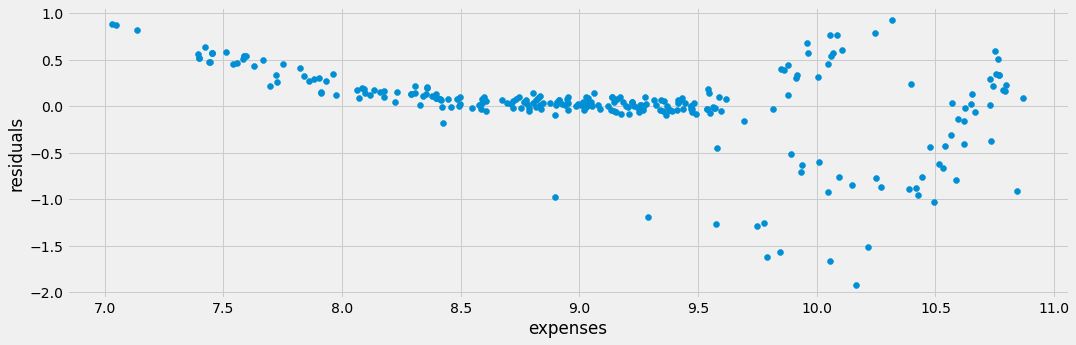

In [ ]:
residuals=y_pred1-y_test
plt.scatter(y_test,residuals)
plt.xlabel('expenses')
plt.ylabel('residuals')

In [ ]:
import statsmodels.stats.diagnostic as dg
import statsmodels.tools.tools as ct
data.loc[:,'const']=ct.add_constant(x_train)
ivar=['const','age','children','smoker']


In [ ]:
# names=x.columns
# #names
# inp_df = pd.DataFrame(x, columns=names)
# inp_df

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,2,1
1,18,2,33.8,1,1,4
2,28,2,33.0,3,1,4
3,33,2,22.7,0,1,2
4,32,2,28.9,0,1,2
...,...,...,...,...,...,...
1333,50,2,31.0,3,1,2
1334,18,1,31.9,0,1,3
1335,18,1,36.9,0,1,4
1336,21,1,25.8,0,1,1


In [ ]:
# import statsmodels.api as sm
# for i in range(0, len(names)):
#     y = inp_df.loc[:, inp_df.columns == names[i]]
#     x = inp_df.loc[:, inp_df.columns != names[i]]
#     model = sm.OLS(y, x)
#     results = model.fit()
#     rsq = results.rsquared
#     vif = round(1 / (1 - rsq), 2)
#     print(
#         "R Square value of {} column is {} keeping all other columns as features".format(
#             names[i], (round(rsq, 2))
#         )
#     )
#     print(
#         "Variance Inflation Factor of {} column is {} \n".format(
#             names[i], vif)
#         )

R Square value of age column is 0.87 keeping all other columns as features
Variance Inflation Factor of age column is 7.91 

R Square value of sex column is 0.89 keeping all other columns as features
Variance Inflation Factor of sex column is 8.76 

R Square value of bmi column is 0.94 keeping all other columns as features
Variance Inflation Factor of bmi column is 17.17 

R Square value of children column is 0.48 keeping all other columns as features
Variance Inflation Factor of children column is 1.9 

R Square value of smoker column is 0.88 keeping all other columns as features
Variance Inflation Factor of smoker column is 8.55 

R Square value of region column is 0.83 keeping all other columns as features
Variance Inflation Factor of region column is 6.04 



In [ ]:
# Variance Inflation Factor Testing
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,7.910756
1,sex,8.759814
2,bmi,17.168907
3,children,1.904860
4,smoker,8.551118
5,region,6.043657


In [ ]:
import statsmodels.api as sm
X1 = sm.add_constant(x_train)
result = sm.OLS(y_train, X1).fit()
print(result.summary())
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test, y_pred1)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          1.01e-321
Time:                        18:48:19   Log-Likelihood:                -683.67
No. Observations:                1070   AIC:                             1375.
Df Residuals:                    1066   BIC:                             1395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0952      0.014    647.799      0.0

ValueError: ignored

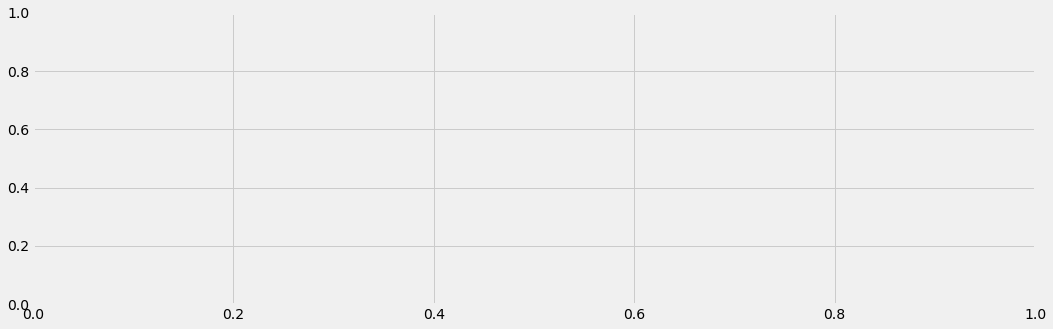

In [ ]:
resid=result.resid
plt.scatter(y_pred1,resid)

In [ ]:
y = data['expenses']
x1 = data.drop(['bmi','expenses'], axis = 1)
print(x1.shape)
print(y.shape)

(1338, 5)
(1338,)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = x1
calc_vif(X)

,variables,VIF
0,age,6.443610
1,sex,7.540383
2,children,1.886777
3,smoker,7.730710
4,region,5.249900


In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

In [ ]:
from sklearn.linear_model import LinearRegression

model11 = LinearRegression()
model11.fit(x_train1, y_train1)

y_pred11 = model11.predict(x_test1)

In [ ]:
import statsmodels.api as sm
X11 = sm.add_constant(x_train1)
result1 = sm.OLS(y_train1, X11).fit()
print(result1.summary())
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test1, y_pred11)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     646.5
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          2.02e-319
Time:                        14:32:02   Log-Likelihood:                -681.97
No. Observations:                1070   AIC:                             1376.
Df Residuals:                    1064   BIC:                             1406.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0952      0.014    648.216      0.0

0.2595832046524254

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test1, y_pred11)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test1, y_pred11)
print("R2 Score :",r2_score)

RMSE Score : 0.4280025910628003
R2 Score : 0.7817943097360608


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred2)
print("R2 Score :",r2_score)

RMSE Score : 0.4188791626369941
R2 Score : 0.7909978331321792


In [11]:
# lets create a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred3)
print("R2 Score :",r2_score)

RMSE Score : 0.3534652314180177
R2 Score : 0.8511781574647539


In [12]:
model3.predict([[2, 37, 2, 2, 4]])

array([10.69673021])

In [14]:
x_test

array([[ 0.91668389,  1.01506676, -0.02741805, -0.50729114, -1.33470543],
       [ 0.56161157, -0.98515688, -0.02741805, -0.50729114,  1.2873291 ],
       [ 0.63262604,  1.01506676,  0.88937298,  1.97125461, -0.46069392],
       ...,
       [ 1.2717562 ,  1.01506676, -0.94420908, -0.50729114,  0.41331759],
       [-0.64563429, -0.98515688,  1.806164  ,  1.97125461,  1.2873291 ],
       [ 0.49059711,  1.01506676,  1.806164  , -0.50729114,  0.41331759]])

In [ ]:
avg_model = (y_pred1 + y_pred2 + y_pred3)/3

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, avg_model)
print("R2 Score :",r2_score)

RMSE Score : 0.36040694931951045
R2 Score : 0.8452753217785501


In [ ]:
# lets create an weighted averaging model

# lets give 50% weight to gradient boosting
# 30% weight to random forest
# and 20% weight to linear regression

weight_avg_model = 0.2*y_pred1 + 0.3*y_pred2 + 0.5*y_pred3

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, weight_avg_model)
print("R2 Score :",r2_score)

RMSE Score : 0.35453309346615786
R2 Score : 0.8502775808665635


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
models=[model1,model2,model3]
for i in models:
  scores = cross_val_score(i, x, y, cv=5)
  print(scores)
  print(scores.mean())

[0.79022025 0.68169583 0.8132741  0.76046877 0.72479683]
0.7540911566118222
[0.80423698 0.66602962 0.82647833 0.78613336 0.72160274]
0.7608962043742897
[0.84767153 0.70322396 0.85247192 0.80767961 0.77480678]
0.797170758490352


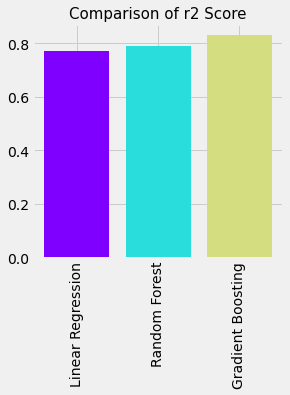

In [ ]:
r2_score = np.array([0.77, 0.79, 0.83])
labels = np.array(['Linear Regression', 'Random Forest' 'Gradient Boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 3), ['Linear Regression', 'Random Forest','Gradient Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()